# Survival on the Titanic Analysis

* The overall survival rate was **_38%_**, which is higher than what it seemed like in the movie!

* **_Children aged <13_** had a much higher chance of survival

* Many more **_women_** than **_men_** survived

* People travelling with other family members were **_almost 2x more likely to survive_**

* Those with **_higher socioeconomic status_** were more likely to survive. I tried to confirm if this was due to the differences in cabin level but the dataset was missing too many cabin records.

## Import CSV

In [1]:
import unicodecsv

with open('titanic_data.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    titanic_data = list(reader)
    
# print(titanic_data[0])

## Clean Data

### Get Dictionary Keys

In [2]:
for dict in titanic_data:
    for key, value in dict.items():
        print(key)
    break

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


### Fix Data Types

In [3]:
# Convert several columns of string data to integers and decimals where appropriate

# Function to convert an integer from string type to integer type
def parse_maybe_int(i):
    if i == None:
        return None
    elif i == '':
        return None
    else:
        return int(i)

# Function to convert a decimal number from string type to float
def parse_maybe_float(i):
    if i == None:
        return None
    elif i == '':
        return None
    else:
        return float(i)
    
for dict in titanic_data:
    dict['PassengerId'] = parse_maybe_int(dict['PassengerId'])
    dict['Survived'] = parse_maybe_int(dict['Survived'])
    dict['Pclass'] = parse_maybe_int(dict['Pclass'])
    dict['Age'] = parse_maybe_float(dict['Age'])
    dict['SibSp'] = parse_maybe_int(dict['SibSp'])
    dict['Parch'] = parse_maybe_int(dict['Parch'])
    dict['Fare'] = float((dict['Fare']))

# print(titanic_data[0])

## Investigate Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
sb.set()

### 1.   Calculate Overall Survival Rate

Number of deaths: 549
Number survived: 342
Total: 891
Overall survival rate: 38%


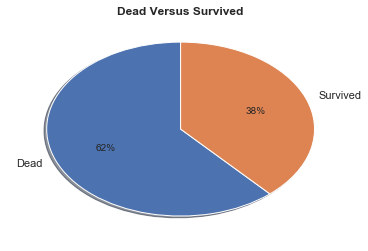

In [5]:
titanic_df = pd.DataFrame(titanic_data)
num_passengers = len(titanic_df)
num_deaths = len(titanic_df[titanic_df["Survived"] == 0])
num_survived = len(titanic_df[titanic_df["Survived"] == 1])

print("Number of deaths: {}\nNumber survived: {}\nTotal: {}".format(num_deaths, num_survived, num_passengers))
print("Overall survival rate: {:.0%}".format(num_survived/num_passengers))

# Pie Chart
plt.pie([num_deaths, num_survived], labels=['Dead', 'Survived'],shadow=True, startangle=90, autopct ="%1.f%%")
plt.title('Dead Versus Survived', fontweight = 'bold')
plt.show()

**Now let's dive into each variable and see how it correlates to survival:**

### 2.   Differences in Socioeconomic Status

#### Let's first assume that ticket type (first, second, third) is indicator of socioeconomic status (upper, middle, lower). We will test this out later.

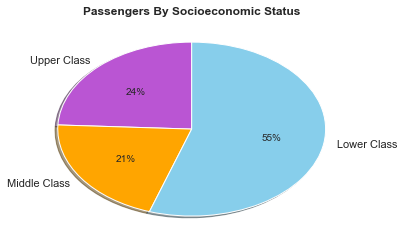

In [6]:
# Calculations using ordered list of dictionaries
upper_class_total, middle_class_total, lower_class_total = 0, 0, 0
upper_class_survived, middle_class_survived, lower_class_survived = 0, 0, 0

for dict in titanic_data:
    if dict['Pclass'] == 1:
        upper_class_total += 1
        if dict["Survived"] == 1:
            upper_class_survived += 1
    elif dict['Pclass'] == 2:
        middle_class_total += 1
        if dict["Survived"] == 1:
            middle_class_survived += 1
    else:
        lower_class_total += 1
        if dict["Survived"] == 1:
            lower_class_survived += 1

# Pie Chart
passengers_by_ses = upper_class_total/num_passengers, middle_class_total/num_passengers, lower_class_total/num_passengers
plt.pie(passengers_by_ses, labels=['Upper Class', 'Middle Class', 'Lower Class'],shadow=True, startangle=90, \
        colors = ['mediumorchid','orange', 'skyblue'], autopct ="%1.f%%")
plt.title('Passengers By Socioeconomic Status', fontweight="bold")
plt.show()

The pie chart shows that there are many more passengers with a third class ticket (lower class) than those with a first and second class ticket combined (upper and middle class).

Next, let's look at who survived in these categories:

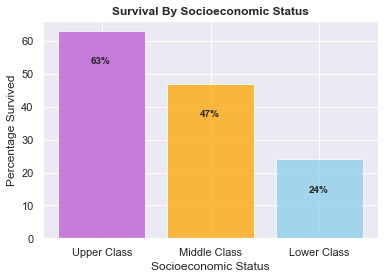

In [7]:
# Survivors by Socioeconomic Status
survivors_by_ses = round(upper_class_survived/upper_class_total,2)*100, \
round(middle_class_survived/middle_class_total,2)*100, \
round(lower_class_survived/lower_class_total,2)*100

# Bar Chart
plt.bar(['Upper Class', 'Middle Class', 'Lower Class'], survivors_by_ses, \
        color = ['mediumorchid','orange', 'skyblue'], alpha = 0.75)
plt.title('Survival By Socioeconomic Status', fontweight = 'bold')
plt.ylabel('Percentage Survived')
plt.xlabel('Socioeconomic Status')

# Bar value labels
for a,b in zip([0,1,2], survivors_by_ses):
    plt.text(a-.1, b-10, str(b)[:2]+'%', fontweight = 'bold')

plt.show()

The bar graph shows an **obvious difference between the percentage of passengers in each class who survived**.

This makes intuitive sense because the lower and middle classes had cabins located on lower levels of the ship.

### Fare by Ticket Class (to check assumption about socioeconomic status divisions)

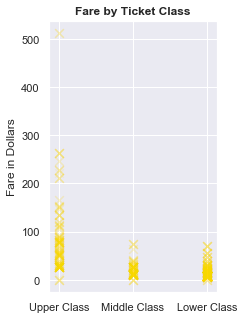

In [8]:
# Scatterplot of Fare By Ticket Class
plt.figure(figsize = (3,5))
plt.scatter(titanic_df['Pclass'], titanic_df['Fare'], s= 75, marker = 'x', color = 'gold', alpha = 0.1)
plt.xticks(np.arange(1, 4), ['Upper Class', 'Middle Class', 'Lower Class'])
plt.title("Fare by Ticket Class", fontweight = 'bold')
plt.ylabel('Fare in Dollars')
plt.show()

This scatter plot shows that the fare price for middle and lower class tickets were actually of a similar range.

It is interesting to see the **large variation in fare prices** for first class tickets.

This reveals a limitation to the upper, middle, and lower class divisions that were assumed beforehand. 

**The ticket type may not be a good indication of socioeconomic status.**

Next, we will try using fare as the socioeconomic indicator instead.

### Survival by Fare

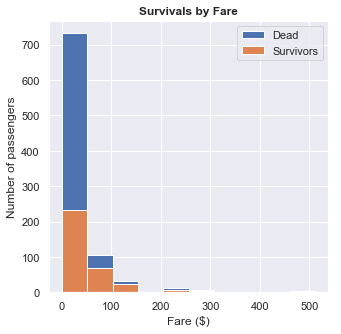

In [9]:
# Histogram of all passengers by fare amount and overlay another historgram of survivors by fare amount
plt.figure(figsize = (5,5))
fares = titanic_df["Fare"]
fares_survived = titanic_df[titanic_df["Survived"] == 1]["Fare"]
plt.hist(fares)
plt.hist(fares_survived)
plt.title("Survivals by Fare", fontweight = 'bold')
plt.xlabel("Fare ($)")
plt.ylabel("Number of passengers")
plt.legend(['Dead', 'Survivors'])
plt.show()

This histogram shows **a low proportion of survivors among those who paid a fare less than $50**.

This may be **a better indicator of survival by socioeconomic status than ticket type**.

Previously, we assumed that the reason for less survivals for passengers with lower socioeconomic status was because they had cabins in the lower floors of the ship. Next, let's check this assumption.

### Survival by Cabin

In [10]:
survival_by_cabin = titanic_df[titanic_df['Cabin']!=""][['Survived', 'Cabin', 'Pclass', 'Fare']]
print("We have {} passengers that have their cabin location recorded.".format(len(survival_by_cabin)))
print("Note that this may be too small of a subset of the original {} to draw conclusions from.".format(num_passengers))

We have 204 passengers that have their cabin location recorded.
Note that this may be too small of a subset of the original 891 to draw conclusions from.


In [11]:
print("Let's first take a look at the data to see how it is structured.")
survival_by_cabin[15:25]

Let's first take a look at the data to see how it is structured.


,Survived,Cabin,Pclass,Fare
75,0,F G73,3,7.6500
88,1,C23 C25 C27,1,263.0000
92,0,E31,1,61.1750
96,0,A5,1,34.6542
97,1,D10 D12,1,63.3583
102,0,D26,1,77.2875
110,0,C110,1,52.0000
118,0,B58 B60,1,247.5208
123,1,E101,2,13.0000
124,0,D26,1,77.2875


From a quick glance through the full table, there are records that have multiple cabins listed under one passenger.

What is the maximum number of cabins one passenger can have? Does it explain the larger fares that we were previously surprised about?

Let's look at the records that have mutiple cabins under one passenger:

In [12]:
# Print out the records that have mutiple cabins under one passenger:
max_cabins = 0
fare_per_cabin = []
for passengerid, row in survival_by_cabin.iterrows():
    cabins = row['Cabin'].split(' ')
    num_cabins = len(cabins)
    if num_cabins > 1:
        # print("Passenger {} has {} cabins with a class {} ticket and paid ${} for fare".format(passengerid, row['Cabin'], row['Pclass'], row['Fare']))
        fare_per_cabin.append(row['Fare']/num_cabins)
    if num_cabins > max_cabins:
        max_cabins = num_cabins
# print("Max number cabins =", max_cabins)

Looking through the full set of prints (which has been commented out for aesthetic reasons), it seems like a combination of F and G cabins always costed $7.65 and were 3rd class tickets.

Besides those passengers, the rest of the passengers with multiple cabins all had 1st class tickets.

Their cabins all started with the same letter (either B, C, or D).

Next, let's see how much each cabin costed:

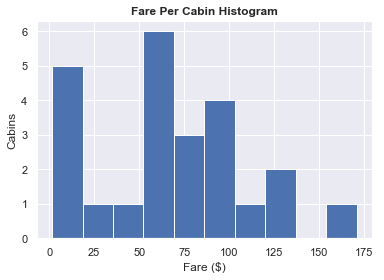

In [13]:
# Draw the Fare-Per-Cabin Histogram
fare_per_cabin.sort()
plt.hist(fare_per_cabin)
plt.title("Fare Per Cabin Histogram", fontweight = 'bold')
plt.xlabel("Fare ($)")
plt.ylabel("Cabins")
print()

It seems like there is still no pattern to the amount of fare paid per cabin.

Next, let's plot the cabin level for all passengers and then for all survivors,
assuming that the first letter of each cabin (B, C, D, E, F, G) stands for the ship level.

Perhaps we will see more survivors in higher levels than lower levels?

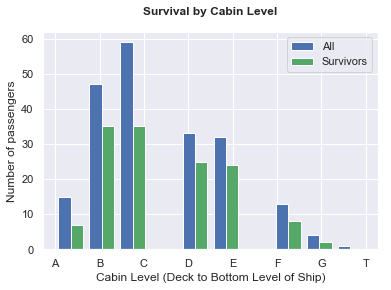

In [14]:
# Plot histogram of cabin level for all and for survivors
survival_by_cabin['Cabin_level'] = survival_by_cabin['Cabin'].str[0]

# Sort by Cabin_level first for better plot visualization
survival_by_cabin = survival_by_cabin.sort_values(by=['Cabin_level'])
cabin_levels_all = list(survival_by_cabin['Cabin_level'])
cabin_levels_survived = list(survival_by_cabin[survival_by_cabin['Survived'] == 1]['Cabin_level'])

# Plot histgrams
plt.style.use('seaborn-deep')
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.hist([cabin_levels_all, cabin_levels_survived], label=("All", "Survivors"))
ax.legend()
plt.title("Survival by Cabin Level", fontweight = 'bold', y = 1.05)
plt.xlabel("Cabin Level (Deck to Bottom Level of Ship)")
plt.ylabel("Number of passengers")
print()

It doesn't look like there are more survivors from the upper decks compared to the total (blue bars), at least from these records. 

We can see that there aren't many records in total for the lower levels. Recall from the beginning that only 204 records out of 891 had cabin location(s) specified.

We tried, but no concrete insights were found here. Let's move on to analyze another variable on survival — gender:

### 3.   Survival by Gender (Male vs. Female)

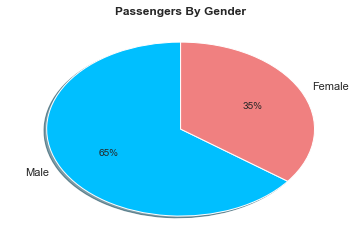

In [15]:
num_males, num_females = 0, 0
num_surviving_males, num_surviving_females = 0, 0
for dict in titanic_data:
    if dict['Sex'] == 'male':
        num_males += 1
        if dict["Survived"] == 1:
            num_surviving_males += 1
    else:
        num_females +=1
        if dict["Survived"] == 1:
            num_surviving_females += 1

# Pie Chart
plt.pie([num_males, num_females], labels=['Male', 'Female'],shadow=True, startangle=90, \
        colors = ['deepskyblue','lightcoral'], autopct='%1.f%%')
plt.title('Passengers By Gender', fontweight = 'bold')
plt.show()

About two thirds of passengers on the Titanic were male and about one third were female.

Next, let's look at the percentage of survivors of each gender.

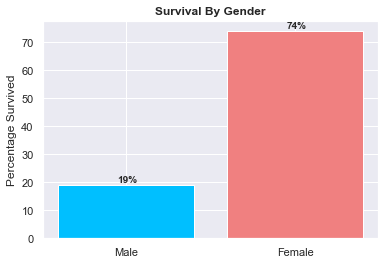

In [16]:
# Bar Chart of Survival By Gender
survivors_by_gender = round(num_surviving_males/num_males,2)*100, round(num_surviving_females/num_females,2)*100
plt.bar(['Male', 'Female'], survivors_by_gender, color = ['deepskyblue','lightcoral'])
plt.title('Survival By Gender', fontweight = 'bold')
plt.ylabel('Percentage Survived')

# Bar value labels
for a,b in zip([0,1], survivors_by_gender):
    plt.text(a-.05, b+1, str(b)[:2]+'%', fontweight = 'bold')

plt.show()

The bar graph shows **a large difference between the percentage of males vs. females who survived**.

This may be because females were prioritized during the evacuation on to lifeboats (as seen from the movie).

### 4.   Survival By Age

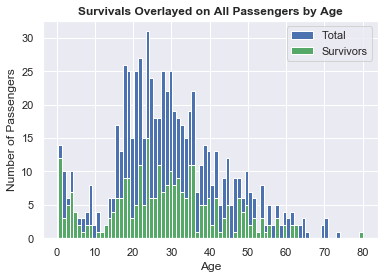

In [17]:
age_list = list(titanic_df['Age'].dropna()) # Remove NaN values too
survival_by_age = list(titanic_df[titanic_df['Survived'] == 1]['Age'].dropna()) # Remove NaN values too

plt.hist(age_list, bins = 80)
plt.hist(survival_by_age, bins = 80)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title("Survivals Overlayed on All Passengers by Age", fontweight = 'bold')
plt.legend(['Total', 'Survivors'])
plt.show()

This histogram shows an even distribution of survivors to passengers across the different ages.

We can see **a larger portion of survivors for children** and a smaller proportion of survivors for adults.

This makes intuitive sense because children were prioritized over the adults during the evacuation.

#### Use collections library for higher granularity in histogram:

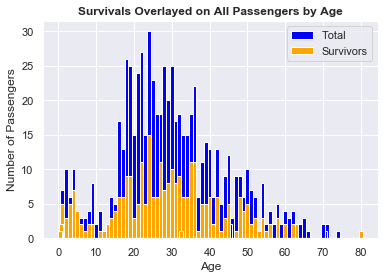

In [18]:
# Same thing but using collections for higher granularity
import collections

freq_age_dict = collections.Counter(age_list)
freq_survived_dict = collections.Counter(survival_by_age)

labels, values = zip(*freq_age_dict.items())
indexes = labels
width = 1
plt.bar(indexes, values, width, color = 'blue')

labels, values = zip(*freq_survived_dict.items())
indexes = labels
width = 1
plt.bar(indexes, values, width, color = 'orange')

plt.title("Survivals Overlayed on All Passengers by Age", fontweight = 'bold')
plt.legend(['Total', 'Survivors'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
print()

This histogram is more granular and shows that pretty much all infants aboard (under 2 years old) survived.

### Survival by Age Category

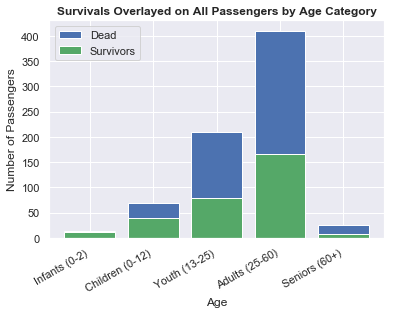

In [19]:
# Categorize by Age Categories
def categorize_by_age(age_list):
    age, num_children, num_infants, num_youth, num_adults, num_seniors = 0, 0, 0, 0, 0, 0
    for i in range(len(age_list)):
        age = age_list[i]
        if age < 13:
            num_children += 1
            if age < 2:
                num_infants += 1
        elif age < 25:
            num_youth += 1
        elif age < 60:
            num_adults += 1
        else:
            num_seniors += 1
    return [num_infants, num_children, num_youth, num_adults, num_seniors]

# Print Bar Chart
age_category_counts = categorize_by_age(age_list)
age_category_survivals = categorize_by_age(survival_by_age)
age_category_labels = ['Infants (0-2)', 'Children (0-12)', 'Youth (13-25)', 'Adults (25-60)', 'Seniors (60+)']

plt.bar(age_category_labels, age_category_counts)
plt.bar(age_category_labels, age_category_survivals)
plt.xticks(age_category_labels, rotation=30, horizontalalignment='right')
plt.title("Survivals Overlayed on All Passengers by Age Category", fontweight = 'bold')
plt.legend(['Dead', 'Survivors'], loc = 'best')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
print()

From a quick glance, this histogram confirms the above finding that **a much higher portion of infants and children survived than adults**.

### 5.   Survival by Number of Family Members Aboard

#### Number of Passengers with and without family aboard

283 passengers with siblings or spouses (32%)
213 passengers with parents or children (24%)
354 passengers with some family (siblings, spouses, parents, or children) (40%)
537 passengers with no family (60%)


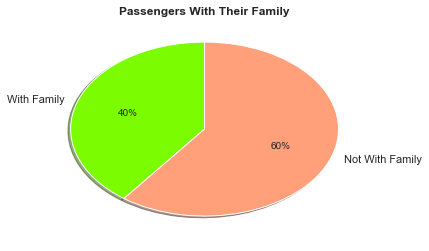

In [20]:
# The dataset has strange categories that we must aggregrate to compare between those with family and those without:

sibsp = titanic_df[titanic_df['SibSp'] > 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]
parch = titanic_df[titanic_df['Parch'] > 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]

# Family: Those with siblings or spouses and those with parents or children
family = pd.concat([sibsp, parch]).drop_duplicates()

# No family: Those without siblings or spouses or those without parents or children
nofamily = titanic_df[titanic_df['SibSp'] + titanic_df['Parch'] == 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]
num_sibsp = len(sibsp)
num_parch = len(parch)
num_family = len(family)
num_nofamily = len(nofamily)

# Print numbers and percentages
print(num_sibsp, "passengers with siblings or spouses", "({:.0%})".format(num_sibsp/num_passengers))
print(num_parch, "passengers with parents or children", "({:.0%})".format(num_parch/num_passengers))
print(num_family, "passengers with some family (siblings, spouses, parents, or children)", "({:.0%})".format(num_family/num_passengers))
print(num_nofamily, "passengers with no family", "({:.0%})".format(num_nofamily/num_passengers))

# Pie chart
plt.pie([num_family, num_nofamily], labels=['With Family', 'Not With Family'],shadow=True, startangle=90, \
        colors = ['lawngreen', 'lightsalmon'], autopct='%1.f%%')
plt.title('Passengers With Their Family', fontweight = 'bold')
plt.show()

### Survival of those with their family versus of those without their family on the Titanic

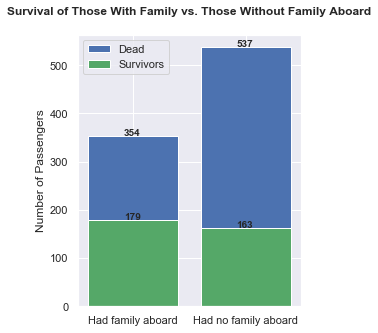

In [21]:
# Calculate number of survivors in each category
family_survivors = family[family['Survived'] == 1]
nofamily_survivors = nofamily[nofamily['Survived'] == 1]
num_family_survivors = len(family_survivors)
num_nofamily_survivors = len(nofamily_survivors)

# Survival rate
survival_percentage_family = round(num_family_survivors/num_family * 100)
survival_percentage_nofamily = round(num_nofamily_survivors/num_nofamily * 100)

# Bar chart
plt.figure(figsize = (4,5))
passenger_numbers = [num_family, num_nofamily]
survivor_numbers = [num_family_survivors, num_nofamily_survivors]
category_labels = ["Had family aboard", "Had no family aboard"]
plt.bar(category_labels, passenger_numbers, label = 'Dead')
plt.bar(category_labels, survivor_numbers, label = 'Survivors')
plt.legend(loc = 'best')
plt.title("Survival of Those With Family vs. Those Without Family Aboard", fontweight = 'bold', y = 1.05)
plt.ylabel('Number of Passengers')

# Bar value labels
for a,b in zip([0,1], survivor_numbers):
    plt.text(a-.08, b+1, str(b), fontweight = 'bold')
for a,b in zip([0,1], passenger_numbers):
    plt.text(a-.08, b+1, str(b), fontweight = 'bold')
    
plt.show()

In [22]:
# Check if the difference is significant
from scipy import stats
np.random.seed(7654567) # fix seed to get the same result (?)
tscore, pvalue = stats.ttest_ind(family['Survived'], nofamily['Survived'], equal_var=False)
if pvalue < 0.01:
    result = 'A sigificant difference was found (p < 0.01)'
elif pvalue < 0.05:
    result = 'A sigificant difference was found (p < 0.05)'
elif pvalue < 0.1:
    result = 'A sigificant difference was not found (p > 0.05)'
print(result)

# Compare likelihood of survival between the two groups
print("Passengers with family aboard were", end=' ')
print(survival_percentage_family/survival_percentage_nofamily, end=' ')
print("times more likely to survive.")

A sigificant difference was found (p < 0.01)
Passengers with family aboard were 1.7 times more likely to survive.


**There is significant difference between the survival of those who had family aboard the Titanic and those who did not (p-value < 0.01).**

## Conclusion

The results found here are in line with previous research on the likelihood of survival in dangerous journeys, particularly the findings from the [Donner Party tragedy](https://www.history.com/topics/westward-expansion/donner-party) (McCurdy, 1994):

|Tragedy                                                              |Titanic           |Donner Party          |
|:--------------------------------------------------------------------|:----------------:|:--------------------:|
|**Year**                                                             |1909              |1846                  |
|**Overall Survival**                                                 |38%               |54%*                  |
|**Age Category with the Highest Survival Rate**                      |Children aged <13 |Children aged 6-14    |
|**Gender with the Higher Survival Rate**                             |Women             |Women                 |
|**Survival Likelihood of Passengers With Family vs. Without Family** |1.7x survival rate|2x survival rate      |

<div style="text-align: right">* Out of 83 people</div>

**So always try to travel with family! And don't worry about the kids!**